In [59]:
%pylab inline
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
from itertools import product

Populating the interactive namespace from numpy and matplotlib


C:\Users\darya\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['product']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1. Прочитайте базу DUQ_hourly.csv сделайте описание особенностей этой выборки,
2. сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам или др., 
3. проверьте на стационарность.
4. Сделайте вывод о том, как изменилось поведение ряда на недельных и месячных графиках по сравнению с дневными или наоборот
5. какие ряды наиболее информативные?

1. Выгрузка данных

In [61]:

df= pd.read_csv('DUQ_hourly.csv',',', index_col=['Datetime'], parse_dates=['Datetime'], dayfirst=True)

In [62]:
df.head()


,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


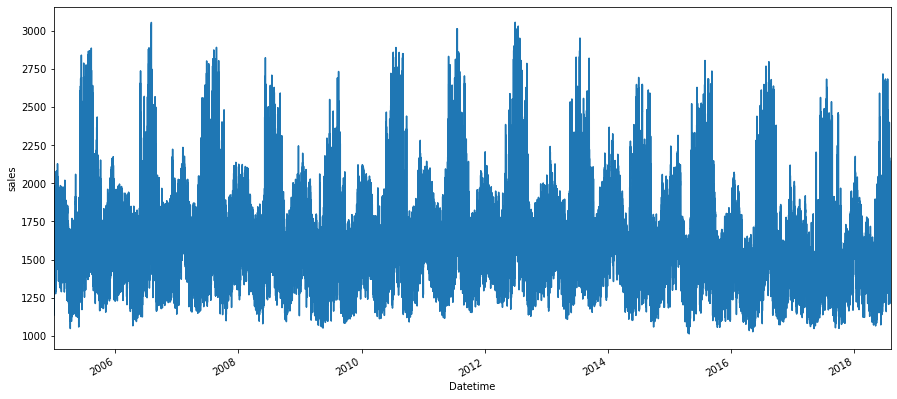

In [63]:
plt.figure(figsize(15,7))
df['DUQ_MW'].plot()
plt.ylabel('sales')
pylab.show()

In [64]:
print(" Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df['DUQ_MW'])[1])


 Критерий Дики-Фуллера: p=0.000000


Ресемплинг по неделям

In [65]:
db = 'DUQ_hourly.csv'
df = pd.read_csv(db)
df["Datetime"] = pd.to_datetime(df["Datetime"])

In [66]:
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

In [67]:
df['date_minus_time'] = df["Datetime"].apply( lambda df : 
datetime.datetime(year=df.year, month=df.month, day=df.day))
df.set_index(df["date_minus_time"],inplace=True)
df


,Datetime,DUQ_MW,date_minus_time
date_minus_time,,,
2005-12-31,2005-12-31 01:00:00,1458.0,2005-12-31
2005-12-31,2005-12-31 02:00:00,1377.0,2005-12-31
2005-12-31,2005-12-31 03:00:00,1351.0,2005-12-31
2005-12-31,2005-12-31 04:00:00,1336.0,2005-12-31
2005-12-31,2005-12-31 05:00:00,1356.0,2005-12-31
2005-12-31,2005-12-31 06:00:00,1372.0,2005-12-31
2005-12-31,2005-12-31 07:00:00,1402.0,2005-12-31
2005-12-31,2005-12-31 08:00:00,1425.0,2005-12-31
2005-12-31,2005-12-31 09:00:00,1502.0,2005-12-31


Критерий Дики-Фуллера

In [68]:
sm.tsa.stattools.adfuller(df['DUQ_MW'])


(-17.786218728400282,
 3.2614963689991824e-30,
 71,
 118996,
 {'1%': -3.4304049551335267,
  '5%': -2.861564289350767,
  '10%': -2.5667829283640278},
 1205216.3829357927)

Преобразования для критерия Кокса-Бокса

-0.5984016899688497
(-17.37309356768308, 5.124131332841826e-30, 71, 118996, {'1%': -3.4304049551335267, '5%': -2.861564289350767, '10%': -2.5667829283640278}, -1605548.7450317175)


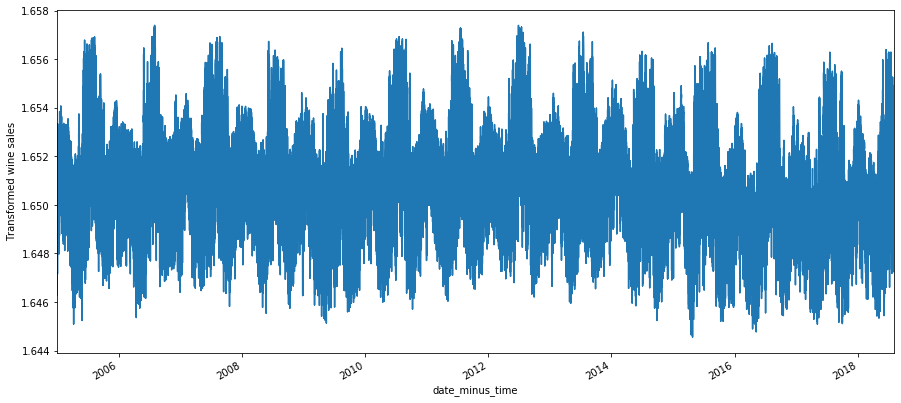

In [69]:
df['DUQ_MW'], lmbda = stats.boxcox(df['DUQ_MW'])
plt.figure(figsize(15,7))
df['DUQ_MW'].plot()
plt.ylabel(u'Transformed wine sales')
print(lmbda)
print(sm.tsa.stattools.adfuller(df['DUQ_MW']))

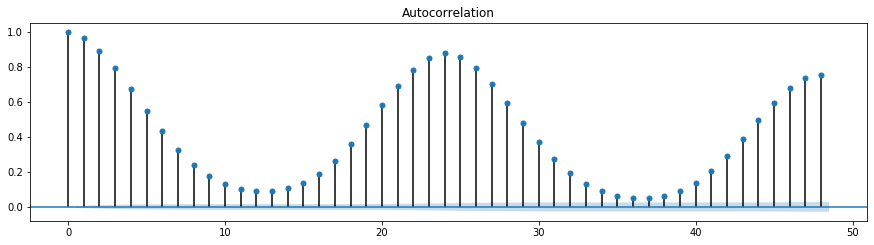

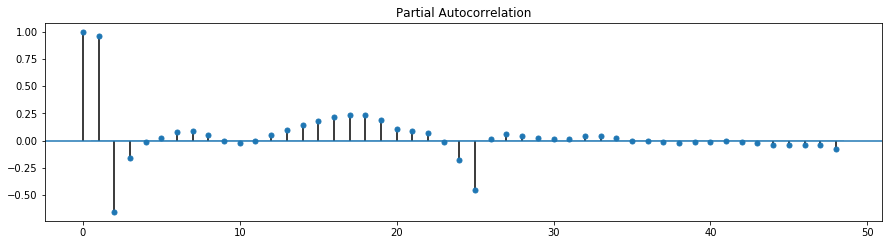

In [70]:
plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df['DUQ_MW'][13:].values.squeeze(), lags=48, ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df['DUQ_MW'][13:].values.squeeze(), lags=48, ax=ax)
pylab.show()

In [71]:
df['date_minus_time'] = df["Datetime"].apply( lambda df : 
datetime.datetime(year=df.year, month=df.month, day=df.day))
df.set_index(df["date_minus_time"],inplace=True)
df

,Datetime,DUQ_MW,date_minus_time
date_minus_time,,,
2005-12-31,2005-12-31 01:00:00,1.649748,2005-12-31
2005-12-31,2005-12-31 02:00:00,1.649004,2005-12-31
2005-12-31,2005-12-31 03:00:00,1.648751,2005-12-31
2005-12-31,2005-12-31 04:00:00,1.648601,2005-12-31
2005-12-31,2005-12-31 05:00:00,1.648800,2005-12-31
2005-12-31,2005-12-31 06:00:00,1.648956,2005-12-31
2005-12-31,2005-12-31 07:00:00,1.649241,2005-12-31
2005-12-31,2005-12-31 08:00:00,1.649453,2005-12-31
2005-12-31,2005-12-31 09:00:00,1.650125,2005-12-31


По средним значениям

In [72]:
df = df.resample('W', on = 'date_minus_time').mean()

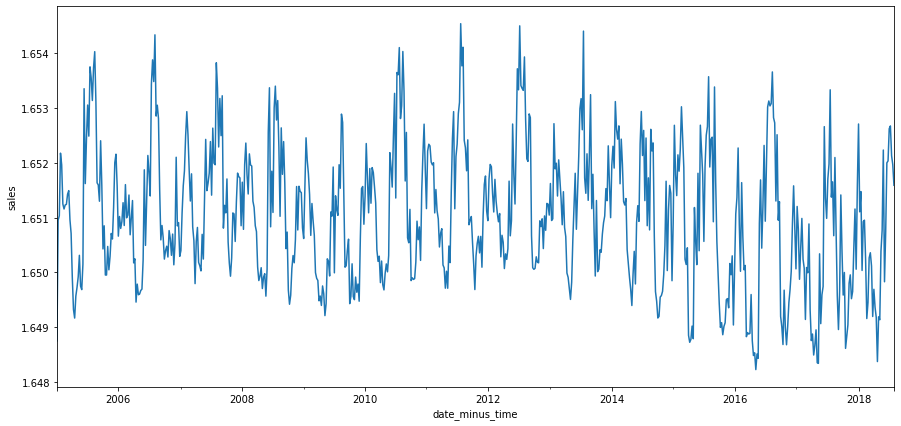

In [73]:
plt.figure(figsize(15,7))
df['DUQ_MW'].plot()
plt.ylabel('sales')
pylab.show()